In [3]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')
print('All library imported')

All library imported


In [ ]:
dir = '/datapath'
os.chdir(dir)
os.getcwd()

In [18]:
# load the dataset
df=pd.read_excel('data.xlsx')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [19]:
# structure of data
df.shape

(303, 14)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
# check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.323432,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.587687,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
# duplicate data
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.shape

(302, 14)

# EDA-- Univariate Analysis

In [26]:
# target var
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

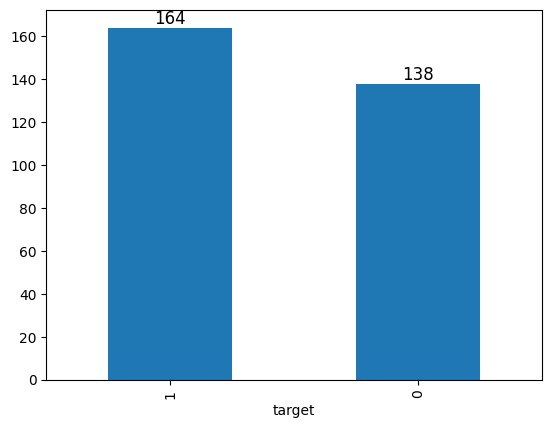

In [27]:
count_plot = df['target'].value_counts().plot(kind='bar')
for p in count_plot.patches:
    count_plot.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., 
                         p.get_height()), 
                        ha='center', va='bottom',
                         fontsize=12, color='black')
plt.show()

In [28]:
# analysis -- The dataset has a higher number of patients without heart disease.

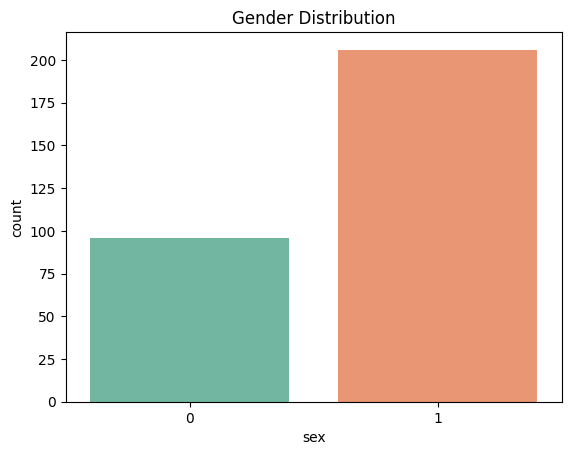

In [29]:
# categorical data- Gender
sns.countplot(x=df['sex'],palette='Set2')
plt.title('Gender Distribution')
plt.show()


In [30]:
#analysis -- more males are in the dataset 

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
df1=df.copy()

In [33]:
df1['sex'].replace({1:'Male',0:'Female'},inplace=True)

In [34]:
df1['sex'].value_counts()

sex
Male      206
Female     96
Name: count, dtype: int64

In [35]:
df1['target'].replace({1:'No',0:'Yes'},inplace=True)

In [36]:
df1['target'].value_counts()

target
No     164
Yes    138
Name: count, dtype: int64

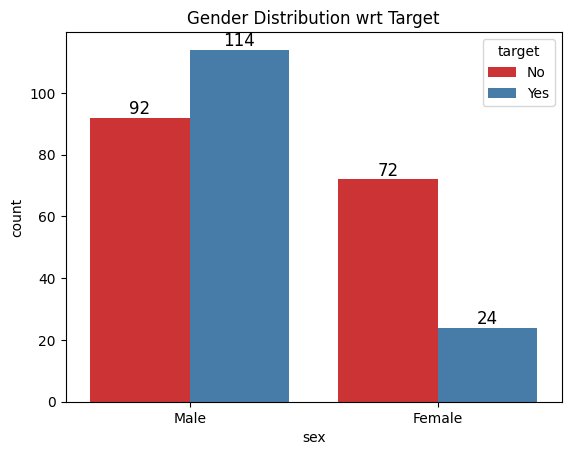

In [37]:
count_plot = sns.countplot(x=df1['sex'],hue='target',data=df1,palette='Set1')
for p in count_plot.patches:
    count_plot.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., 
                         p.get_height()), 
                        ha='center', va='bottom',
                         fontsize=12, color='black')
plt.title('Gender Distribution wrt Target')
plt.show()


In [38]:
# analysis---males are 114 , males have more chances to get heart dis.

In [39]:
# chest Pain
df1['cp'].value_counts()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

In [40]:
# chest pain type (0 = Non anginal; 1 = Non typical; 2 = Asymptomatic; 3 = Typical)
df1['cp'] = df1['cp'].replace({ 3 : 'Typical',2 :'Asymptomatic', 1 : 'Non typical',0  :'Non anginal'})

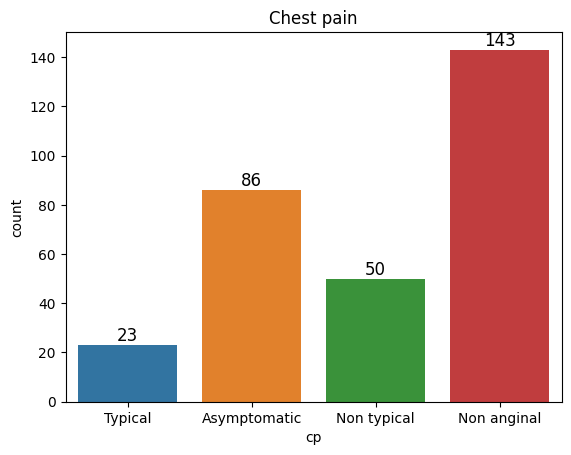

In [41]:
count_plot = sns.countplot(x=df1['cp'])
for p in count_plot.patches:
    count_plot.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., 
                         p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=12, color='black')
plt.title('Chest pain')
plt.show()

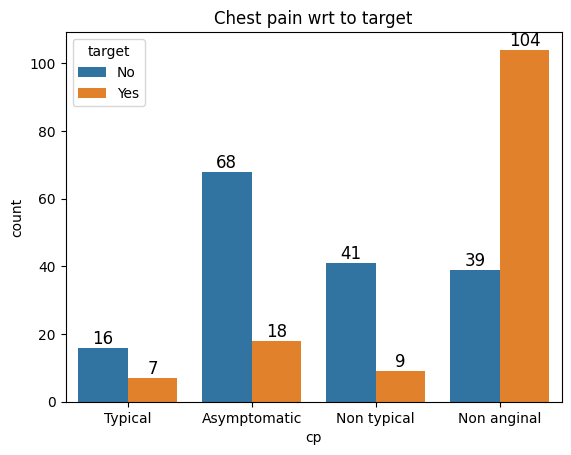

In [42]:
count_plot = sns.countplot(x=df1['cp'],hue='target',data=df1)
for p in count_plot.patches:
    count_plot.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., 
                         p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=12, color='black')
plt.title('Chest pain wrt to target')
plt.show()

<p>If a certain chest pain type 0 happens more often, it means many patients have non anginal , which can be a sign of heart disease. Other chest pain type have less expectation that he could have a heart disease</p>.

In [43]:
df1[df1['target']=='Yes'].shape[0]

138

In [44]:
df_has_dis=df1[df1['target']=='Yes']
df_has_dis.shape

(138, 14)

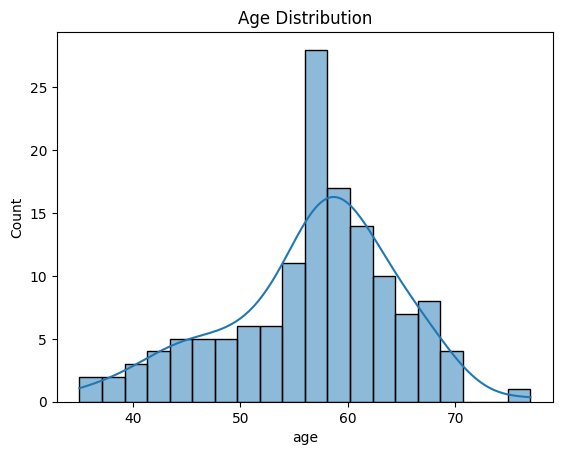

In [45]:
sns.histplot(x=df_has_dis['age'],kde=True,bins=20)
plt.title('Age Distribution')
plt.show()

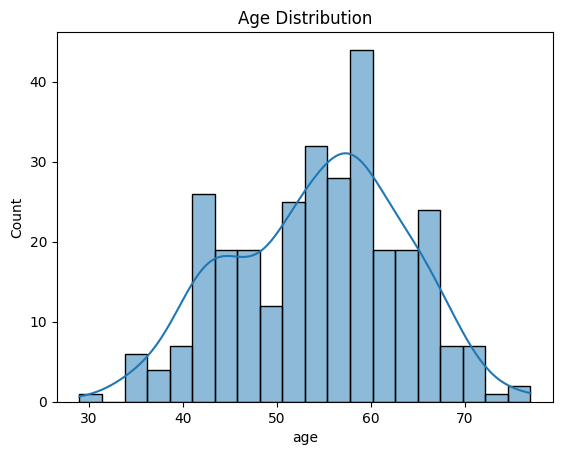

In [46]:
# age is numerical var
sns.histplot(x=df1['age'],kde=True,bins=20)
plt.title('Age Distribution')
plt.show()

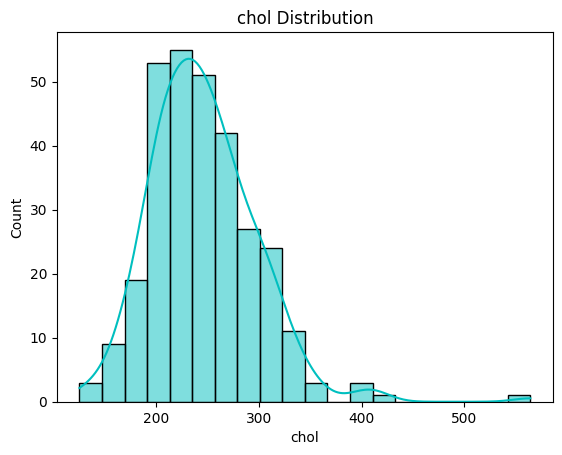

In [47]:
sns.histplot(x=df1['chol'],kde=True,bins=20,color='c')
plt.title('chol Distribution')
plt.show()

In [48]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

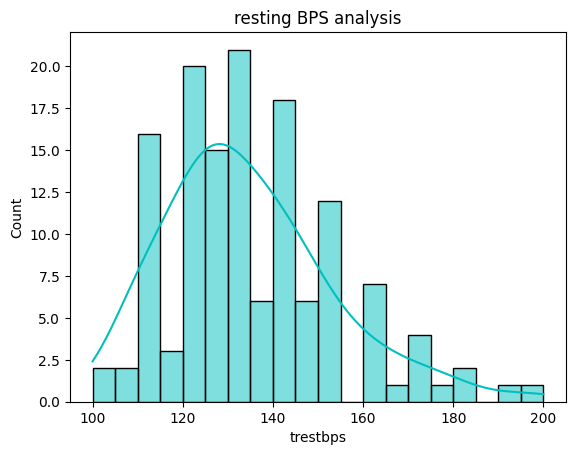

In [76]:
count_plot = sns.histplot(x=df_has_dis['trestbps'],kde=True,bins=20,color='c')

plt.title('resting BPS analysis')
plt.show()

In [50]:
df1[df1['target']=='Yes'].shape[0]

138

In [51]:
df_has_dis = df1[df1['target']=='Yes']
df_has_dis.shape


(138, 14)

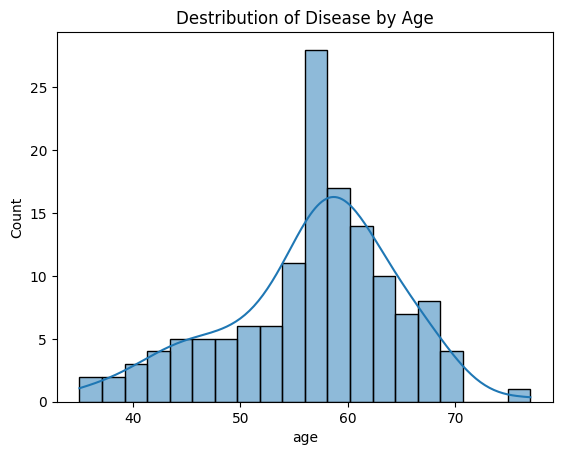

In [52]:
sns.histplot(x=df_has_dis['age'],kde=True,bins=20)
plt.title('Destribution of Disease by Age')
plt.show()

<p> heart disease is more common in that age group of (50-60 years old)</p>

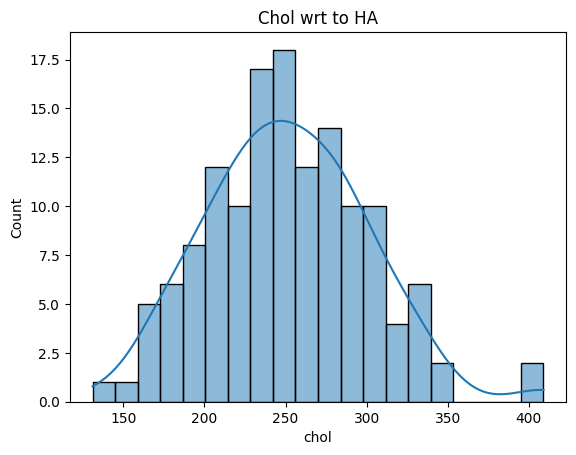

In [53]:
sns.histplot(x=df_has_dis['chol'],kde=True,bins=20)
plt.title('Chol wrt to HA')
plt.show()

<p>  most heart disease patients have cholesterol levels in this range (200-300 mg/dl)</p>

In [54]:
df1['exang']

0      0
1      0
2      0
3      0
4      1
      ..
298    1
299    0
300    0
301    1
302    0
Name: exang, Length: 302, dtype: int64

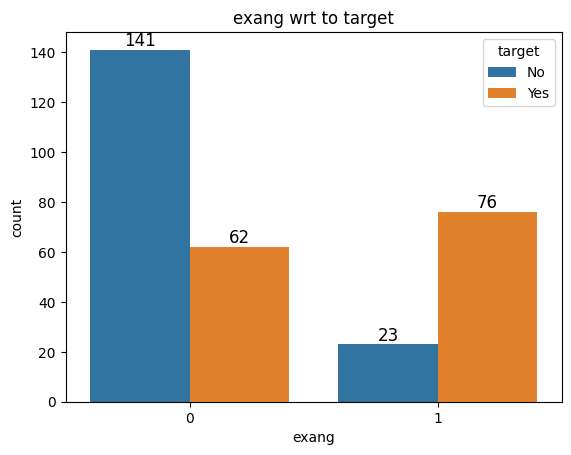

In [77]:
count_plot = sns.countplot(x=df1['exang'],hue='target',data=df1)
for p in count_plot.patches:
    count_plot.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., 
                         p.get_height()), 
                        ha='center', va='bottom',
                         fontsize=12, color='black')
plt.title('exang wrt to target')
plt.show()

In [80]:
corr = df.corr()

# correlation matrix
print("Correlation Matrix:")
print(corr)

Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.094962 -0.063107  0.283121  0.207216  0.119492   
sex      -0.094962  1.000000 -0.051740 -0.057647 -0.195571  0.046022   
cp       -0.063107 -0.051740  1.000000  0.046486 -0.072682  0.096018   
trestbps  0.283121 -0.057647  0.046486  1.000000  0.125256  0.178125   
chol      0.207216 -0.195571 -0.072682  0.125256  1.000000  0.011428   
fbs       0.119492  0.046022  0.096018  0.178125  0.011428  1.000000   
restecg  -0.111590 -0.060351  0.041561 -0.115367 -0.147602 -0.083081   
thalach  -0.395235 -0.046439  0.293367 -0.048023 -0.005308 -0.007169   
exang     0.093216  0.143460 -0.392937  0.068526  0.064099  0.024729   
oldpeak   0.206040  0.098322 -0.146692  0.194600  0.050086  0.004514   
slope    -0.164124 -0.032990  0.116854 -0.122873  0.000417 -0.058654   
ca        0.302261  0.113060 -0.195356  0.099248  0.086878  0.144935   
thal      0.064147  0.219753 -0.171964  0.06

<p>Chest Pain Type (cp) has a strong positive effect on the target with a correlation of 0.4321, meaning more severe chest pain is linked to a higher chance of the target condition. Exercise Induced Angina (exang) has a strong negative effect, with a correlation of -0.4356, indicating that those with angina are less likely to have the target condition. 
Oldpeak has a negative effect (-0.4291), where higher values suggest a lower likelihood of the target. Finally, Maximum Heart Rate (thalach) shows a positive effect with a correlation of 0.4200, meaning higher heart rates are associated with a higher chance of the target condition.</p>

In [57]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [58]:
# create machine learning model, sklearn
# create Indep var & dep var
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [59]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [60]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [61]:
#import sklear libraries
from sklearn.model_selection import train_test_split

In [62]:
# split the data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [63]:
X_train.shape

(241, 13)

In [64]:
X_test.shape

(61, 13)

In [65]:
# apply logistic regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [66]:
# predict
y_pred = log_reg.predict(X_test)


In [67]:
#check accuracy of the project
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.8852459016393442


In [68]:
df.to_excel('cleaned_data.xlsx', index=False)  
